Požadované výsledky:
1. Graf závislosti maximální výstupní energie Emax na odrazivosti výstupního zrcadla ROC. 
Pro všechna testovaná zrcadla graf a tabulka závislosti výstupní energie E a účinnosti η = E/Eb na budící energii Eb. 
Pro optimální výstupní zrcadlo graf a tabulka závislosti délky impulsu τFR, a středního výkonu Pstr = E/τFR na budící energii Eb.
Doplňte obrázky časových průběhů záření a hustotu energie při maximální energii Wmax = Emax/S (v J/cm2).
2. Graf závislosti zesílení impulsu G na budící energii laserového oscilátoru pro optimální výstupní zrcadlo.
3. Výsledky měření délky τQ, energie EQ, špičkového výkonu PQ (vše s odchylkou), plošné hustoty energie WQ
Q-spínaných impulsů a záznam časového vývoje (z osciloskopu) Q-spínaného impulsu. Porovnejte plošnou
hustotu energie impulsu v režimu Q-spínání a v režimu volné generace.

In [142]:
import pandas as pd # pandas k nacitani dat z excelu
import numpy as np # numpy pro vypocty
import matplotlib.pyplot as plt # vykreslovani grafu

In [143]:
prevodni_tabulka = pd.read_excel("data_01.xlsx", sheet_name="prevodni_tabulka", engine="openpyxl", usecols="A, B", index_col=0)
zrcadlo_M337 = pd.read_excel("data_01.xlsx", sheet_name="volne", engine="openpyxl", skiprows=1, usecols="A, B", nrows=12)
kremenne_sklo = pd.read_excel("data_01.xlsx", sheet_name="volne", engine="openpyxl", skiprows=1, usecols="C, D", nrows=12)
zrcadlo_M237 = pd.read_excel("data_01.xlsx", sheet_name="volne", engine="openpyxl", skiprows=1, usecols="E, F", nrows=12)
prevodni_tabulka = prevodni_tabulka.to_dict(orient="dict")["U [V]"]


In [144]:
zrcadlo_M337_prevedene = pd.DataFrame.from_dict({
    "U_b [V]":[prevodni_tabulka[d] for d in zrcadlo_M337["zdroj [dilky]"]], 
    "D2 [mV]": list(zrcadlo_M337["D2 [mV]"])})
kremenne_sklo_prevedene = pd.DataFrame.from_dict({
    "U_b [V]":[prevodni_tabulka[d] for d in kremenne_sklo["zdroj [dilky].1"]],
    "D2 [mV]":list(kremenne_sklo["D2 [mV].1"])})
zrcadlo_M237_prevedene = pd.DataFrame.from_dict({
    "U_b [V]":[prevodni_tabulka[d] for d in zrcadlo_M237["zdroj [dilky].2"]],
    "D2 [mV]":list(zrcadlo_M237["D2 [mV].2"])})

1. Graf závislosti maximální výstupní energie Emax na odrazivosti výstupního zrcadla ROC. 

Pro všechna testovaná zrcadla graf a tabulka závislosti výstupní energie E a účinnosti η = E/Eb na budící energii Eb. 

Pro optimální výstupní zrcadlo graf a tabulka závislosti délky impulsu τFR, a středního výkonu Pstr = E/τFR na budící energii Eb.

Doplňte obrázky časových průběhů záření a hustotu energie při maximální energii Wmax = Emax/S (v J/cm2).

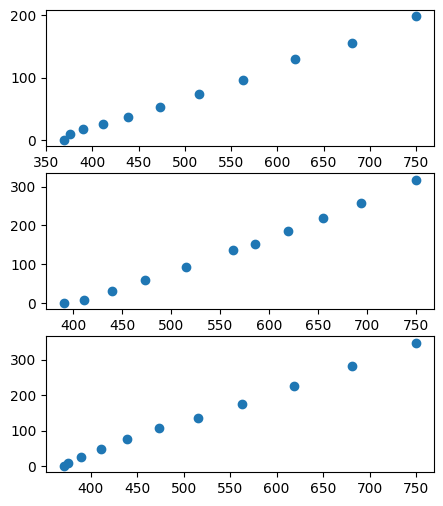

In [145]:
d_svazku = 3.6 #mm
zdroj_M337 = [prevodni_tabulka[d] for d in zrcadlo_M337["zdroj [dilky]"]]
zdroj_kremenne_sklo = [prevodni_tabulka[d] for d in kremenne_sklo["zdroj [dilky].1"]]
zdroj_M237 = [prevodni_tabulka[d] for d in zrcadlo_M237["zdroj [dilky].2"]]


fig_zrcadla, ax = plt.subplots(3, 1, figsize=(5,6))
ax[0].scatter(zrcadlo_M337_prevedene["U_b [V]"], zrcadlo_M337_prevedene["D2 [mV]"])
ax[1].scatter(kremenne_sklo_prevedene["U_b [V]"], kremenne_sklo_prevedene["D2 [mV]"])
ax[2].scatter(zrcadlo_M237_prevedene["U_b [V]"], zrcadlo_M237_prevedene["D2 [mV]"])

with open("tabulka_M337.txt", "w") as file:
    file.write(zrcadlo_M337_prevedene.to_latex(index=False))

with open("tabulka_kremenne_sklo.txt", "w") as file:
    file.write(kremenne_sklo_prevedene.to_latex(index=False))

with open("tabulka_M237.txt", "w") as file:
    file.write(zrcadlo_M237_prevedene.to_latex(index=False))

